In [1]:
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load Data
df_train = pd.read_csv('/home/sh0brun/Documents/Untitled Folder/DataMining/train_convert.csv')
print(df_train)

      Unnamed: 0    Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  \
0              0     1          60         1         65.0     8450       1   
1              1     2          20         1         80.0     9600       1   
2              2     3          60         1         68.0    11250       1   
3              3     4          70         1         60.0     9550       1   
4              4     5          60         1         84.0    14260       1   
5              5     6          50         1         85.0    14115       1   
6              6     7          20         1         75.0    10084       1   
7              7     8          60         1          0.0    10382       1   
8              8     9          50         2         51.0     6120       1   
9              9    10         190         1         50.0     7420       1   
10            10    11          20         1         70.0    11200       1   
11            11    12          60         1         85.0    119

In [3]:
#Take sample feature
sample_df_train = df_train[['LotArea','LotFrontage','Alley','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','TotRmsAbvGrd','GarageArea','OpenPorchSF','EnclosedPorch','GarageArea','SalePrice']]
print(sample_df_train.head())

   LotArea  LotFrontage  Alley  OverallQual  YearBuilt  YearRemodAdd  \
0     8450         65.0      0            7       2003          2003   
1     9600         80.0      0            6       1976          1976   
2    11250         68.0      0            7       2001          2002   
3     9550         60.0      0            7       1915          1970   
4    14260         84.0      0            8       2000          2000   

   MasVnrArea  BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0       196.0         706          856       856       854       1710   
1         0.0         978         1262      1262         0       1262   
2       162.0         486          920       920       866       1786   
3         0.0         216          756       961       756       1717   
4       350.0         655         1145      1145      1053       2198   

   TotRmsAbvGrd  GarageArea  OpenPorchSF  EnclosedPorch  GarageArea  SalePrice  
0             8         548           61       

In [4]:
#Clean Data
sample_df_train = sample_df_train.dropna()

In [5]:
y_sample = sample_df_train['SalePrice']
sample_df_train = sample_df_train.drop('SalePrice',axis = 1)
# test = pd.merge(sample_df_train,y_sample,right_index = True,left_index = True)
# test

# Standardization


In [6]:
from sklearn import preprocessing
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
x_scaled = scaler.fit_transform(sample_df_train)
x_sample = pd.DataFrame(x_scaled, columns=sample_df_train.columns)

# Normalization
### Formula Transformation
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
<br> X_scaled = X_std * (max - min) + min
<br> nb: max and min given by feature_range

In [7]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1),copy=True)
# x_scaled = scaler.fit_transform(sample_df_train)
# x_sample = pd.DataFrame(x_scaled)
sampled = pd.merge(x_sample,y_sample,right_index = True, left_index = True)
# print(sampled)

# Create Train and Test Set from train.csv

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(sampled,test_size = 0.3)
# print(train)
# print(test)
x_train = train.drop('SalePrice',axis = 1)
y_train = train['SalePrice']

x_test = test.drop('SalePrice', axis = 1)
y_test = test['SalePrice']

# Predict

In [9]:
#Import support library
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt


In [10]:
K = 3
# Make the model
model = neighbors.KNeighborsRegressor(n_neighbors=K)

# Fitting 
model.fit(x_train,y_train)

# Prediction
prediction = model.predict(x_test)
prediction

array([267166.66666667, 265807.33333333, 206218.33333333, 159716.66666667,
       147333.33333333, 137333.33333333, 333166.66666667, 150800.        ,
       240496.66666667, 144333.33333333, 148000.        , 195200.        ,
       175866.66666667, 187163.33333333, 128333.33333333, 111833.33333333,
       202866.66666667, 128833.33333333, 112166.66666667, 138700.        ,
       116500.        , 148733.33333333, 157666.66666667, 258633.33333333,
       151500.        , 110333.33333333, 164000.        , 216166.66666667,
       139833.33333333, 194883.33333333, 145666.66666667, 219066.66666667,
       178700.        , 152883.33333333, 137300.        , 136966.66666667,
       155333.33333333, 107933.33333333, 127033.33333333, 124833.33333333,
       260666.66666667,  95100.        , 176050.        , 127333.33333333,
       297708.        , 181206.33333333, 159000.        , 108000.        ,
       194333.33333333, 194000.        , 237500.        , 106766.66666667,
       142300.        , 3

# Check Error

In [11]:
error = sqrt(mean_squared_error(y_test,prediction))
error

37286.44727635485

## Check Error with some 

In [12]:
all_error = [] 
str_error = []
for K in range(100):
    K += 1
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    
    #fitting
    model.fit(x_train,y_train)
    
    #prediction
    prediction = model.predict(x_test)
    
    #count error and store it
    error = sqrt(mean_squared_error(y_test,prediction))
    
    all_error.append(error)
    str_ ="RMSE for K = " + str(K) + " is " + str(error) 
    str_error.append(str_)
str_error

['RMSE for K = 1 is 37345.236775764315',
 'RMSE for K = 2 is 36518.129975484684',
 'RMSE for K = 3 is 37286.44727635485',
 'RMSE for K = 4 is 37410.81546091679',
 'RMSE for K = 5 is 37250.322997755036',
 'RMSE for K = 6 is 37186.0681115876',
 'RMSE for K = 7 is 36910.55251198883',
 'RMSE for K = 8 is 36518.26458774821',
 'RMSE for K = 9 is 36695.835891716844',
 'RMSE for K = 10 is 36641.026011426664',
 'RMSE for K = 11 is 36143.147821370396',
 'RMSE for K = 12 is 35721.97704660023',
 'RMSE for K = 13 is 35359.85604520046',
 'RMSE for K = 14 is 35423.75218428499',
 'RMSE for K = 15 is 35239.23276612798',
 'RMSE for K = 16 is 35194.79252638325',
 'RMSE for K = 17 is 35261.80637398861',
 'RMSE for K = 18 is 35337.75040652251',
 'RMSE for K = 19 is 35348.5750050095',
 'RMSE for K = 20 is 35433.354150189574',
 'RMSE for K = 21 is 35550.59391482594',
 'RMSE for K = 22 is 35585.73001083938',
 'RMSE for K = 23 is 35627.16791502122',
 'RMSE for K = 24 is 35551.51042271884',
 'RMSE for K = 25 is

## Plotting

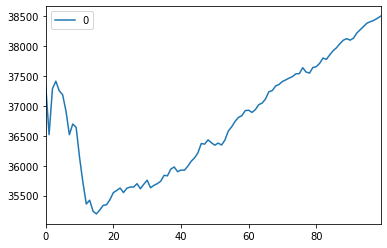

In [13]:
plot_curve = pd.DataFrame(all_error)
plot_curve.plot()


In [14]:
mini = all_error[0]
index = 0
for i in range(len(all_error)):
     if all_error[i]<mini :
            mini = all_error[i]
            index = i+1

print("The smallest value RMSE is ",mini," in index ",index)

The smallest value RMSE is  35194.79252638325  in index  16


## Predict Test.csv

### Load Data Test

In [18]:
df_test = pd.read_csv("/home/sh0brun/Documents/Untitled Folder/DataMining/test_convert.csv");
df_test = df_test[['LotArea','LotFrontage','Alley','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','TotRmsAbvGrd','GarageArea','OpenPorchSF','EnclosedPorch','GarageArea']]

### Standardization

In [19]:
test_scaled = scaler.fit_transform(df_test)
# test_scaled
test_scaled = pd.DataFrame(test_scaled)
print(test_scaled)

            0         1         2         3         4         5         6   \
0     0.363929  0.684849 -0.269555 -0.751101 -0.340945 -1.072885 -0.563316   
1     0.897861  0.715852 -0.269555 -0.054877 -0.439695 -1.214908  0.047057   
2     0.809646  0.498831 -0.269555 -0.751101  0.844059  0.678742 -0.563316   
3     0.032064  0.622843 -0.269555 -0.054877  0.876976  0.678742 -0.450284   
4    -0.971808 -0.462261 -0.269555  1.337571  0.679475  0.394694 -0.563316   
5     0.036505  0.529834 -0.269555 -0.054877  0.712392  0.489377 -0.563316   
6    -0.371261 -1.795387 -0.269555 -0.054877  0.679475  1.104813 -0.563316   
7    -0.286074  0.157798 -0.269555 -0.054877  0.876976  0.678742 -0.563316   
8     0.072033  0.839863 -0.269555  0.641347  0.613642  0.300012 -0.563316   
9    -0.286478  0.374819 -0.269555 -1.447325 -0.044694 -0.646813 -0.563316   
10   -0.799618 -0.989311 -0.269555  0.641347  0.909893  0.726083 -0.563316   
11   -1.643007 -1.144325 -0.269555 -0.054877 -0.011777 -0.599472

# Predict Test

In [20]:
predict = model.predict(test_scaled)
predict

array([134591.51, 141407.  , 184139.27, ..., 164193.5 , 126612.65,
       224077.42])

In [21]:
pd_predict = pd.DataFrame(predict)
result = pd.merge(df_test,pd_predict,right_index = True, left_index = True)
result.rename(columns = {0:"SalePrice"}, inplace = True)
print(result)

      LotArea  LotFrontage  Alley  OverallQual  YearBuilt  YearRemodAdd  \
0       11622         80.0      0            5       1961          1961   
1       14267         81.0      0            6       1958          1958   
2       13830         74.0      0            5       1997          1998   
3        9978         78.0      0            6       1998          1998   
4        5005         43.0      0            8       1992          1992   
5       10000         75.0      0            6       1993          1994   
6        7980          0.0      0            6       1992          2007   
7        8402         63.0      0            6       1998          1998   
8       10176         85.0      0            7       1990          1990   
9        8400         70.0      0            4       1970          1970   
10       5858         26.0      0            7       1999          1999   
11       1680         21.0      0            6       1971          1971   
12       1680         21.

In [22]:
result.to_csv("/home/sh0brun/Documents/Untitled Folder/DataMining/result.csv")